# ROMY - Barometer

In [1]:
import os
import obspy as obs
import matplotlib.pyplot as plt
import numpy as np

from functions.baroseis import baroseis

In [2]:
# load config
config = baroseis.load_from_yaml("./data/config_FFBI_ROMY_file.yaml")

In [3]:
# Initialize baroseis object
bs = baroseis(conf=config)


In [4]:

# Can also override time window
# bs.load_data(
#     tbeg="2025-02-20 07:00",
#     tend="2025-02-20 10:00",
# )

# bs.load_data(
#     tbeg="2024-04-23 02:00",
#     tend="2024-04-23 05:00",
# )

# good event
bs.load_data(
    tbeg="2024-03-15 15:00",
    tend="2024-03-15 18:00",
)

# good event
# bs.load_data(
#     tbeg="2024-03-24 15:00",
#     tend="2024-03-24 17:00",
# )


True
 -> Warning: Number of samples mismatch: BW.ROMY.40.BJE
 -> Warning: Number of samples mismatch: BW.ROMY.40.BJN
Adding Hilbert transform...

 -> Runtime: 0.0 minutes



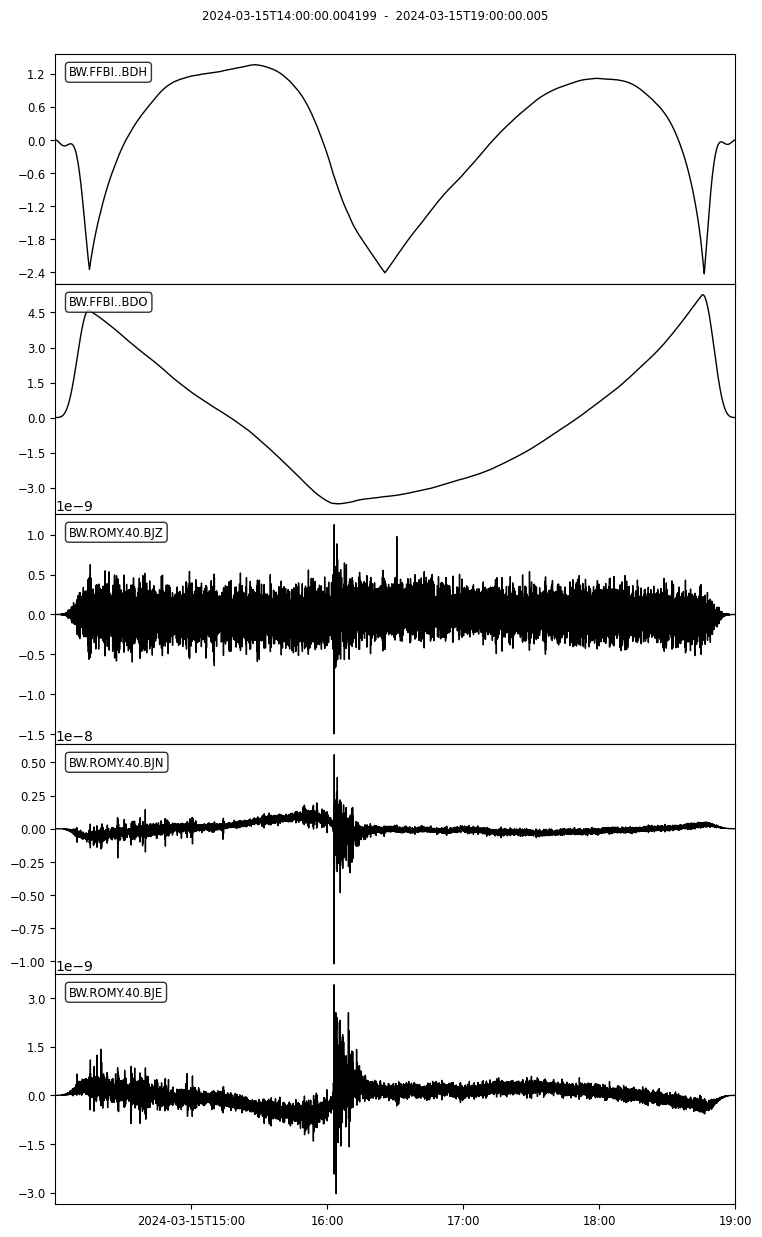

In [5]:
bs.st.plot(equal_scale=False);

In [6]:
bs.filter_data(fmin=0.0005, fmax=0.01)

Removing mean and trend...
Applying bandpass filter: 0.0005-0.01 Hz
 -> Warning: Number of samples mismatch: BW.ROMY.40.BJE
 -> Warning: Number of samples mismatch: BW.ROMY.40.BJN


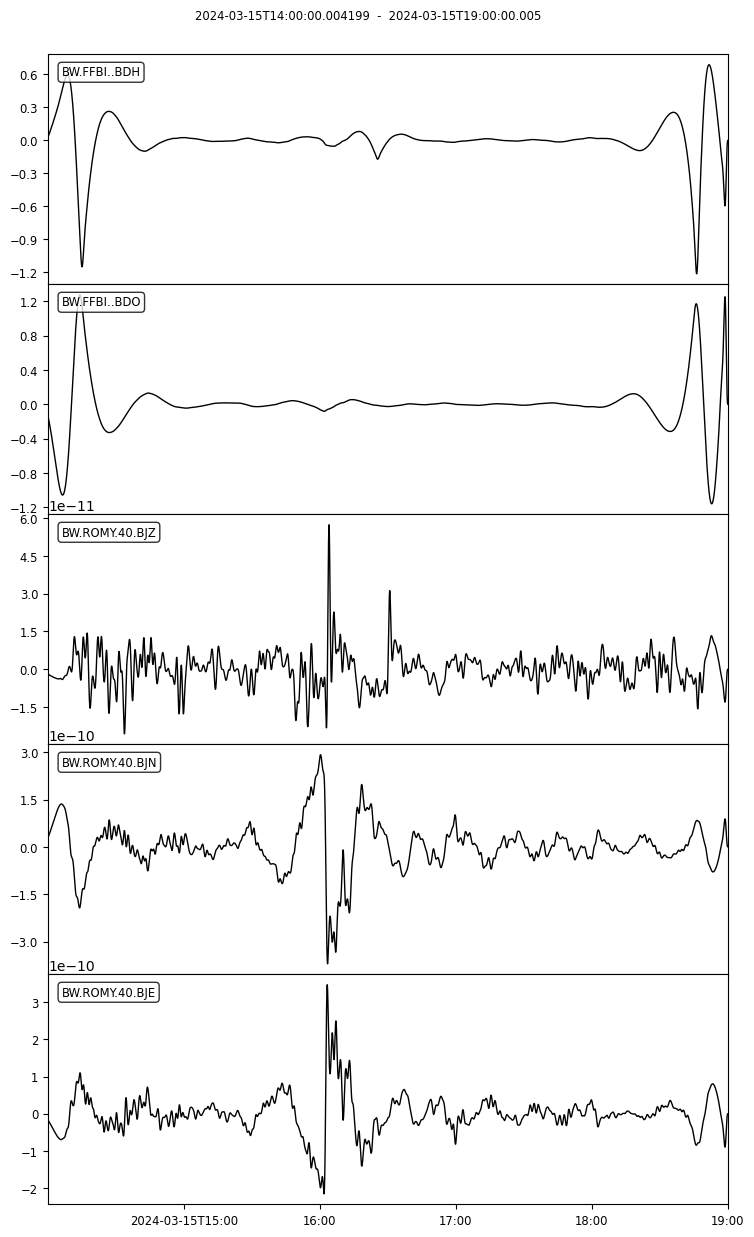

In [7]:
bs.st.plot(equal_scale=False);

 -> Integrating BW.ROMY.40.BJE
 -> Integrating BW.ROMY.40.BJN
 -> Integrating BW.ROMY.40.BJZ


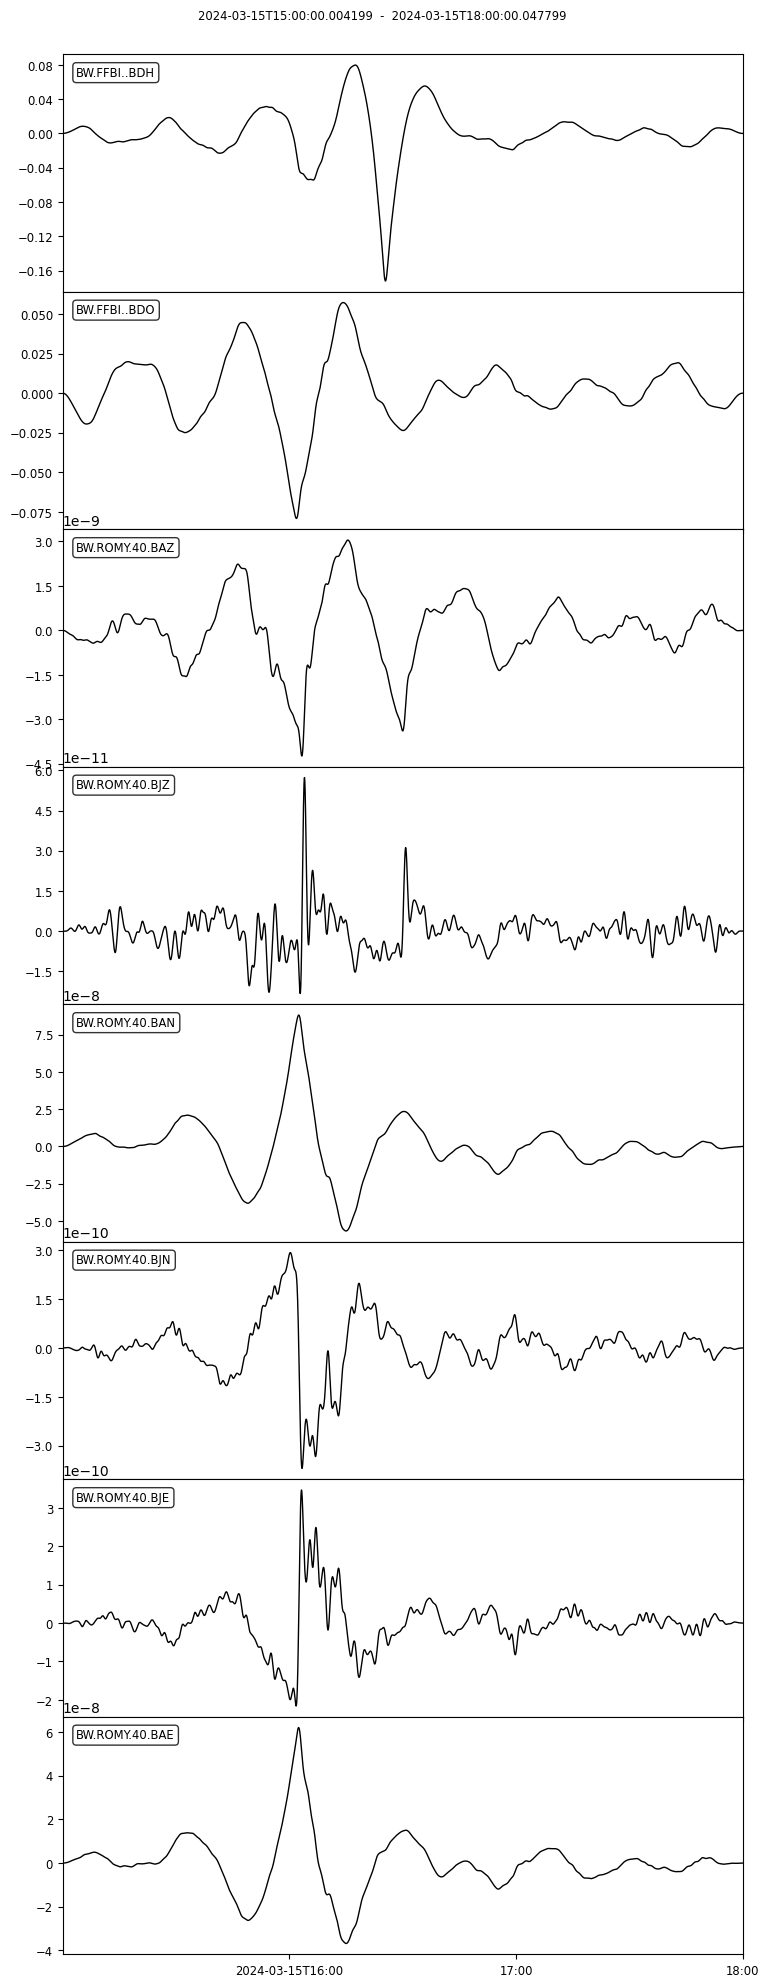

In [8]:

# integrate rotation to tilt
bs.integrate_data(method="cumtrapz") # method = "cumtrapz" or "spline"


# trim waveforms
bs.st = bs.st.trim(bs.config['tbeg'], bs.config['tend'])

# detrend waveforms
bs.st.detrend("demean")

# taper edges
bs.st.taper(0.05)

# show new waveforms
bs.st.plot(equal_scale=False);


BW.ROMY.40.BJZ | 2024-03-15T15:00:00.004199Z - 2024-03-15T18:00:00.004199Z | 1.0 Hz, 10801 samples
BW.ROMY.40.BJN | 2024-03-15T15:00:00.012800Z - 2024-03-15T18:00:00.012800Z | 1.0 Hz, 10801 samples
BW.ROMY.40.BJE | 2024-03-15T15:00:00.047799Z - 2024-03-15T18:00:00.047799Z | 1.0 Hz, 10801 samples


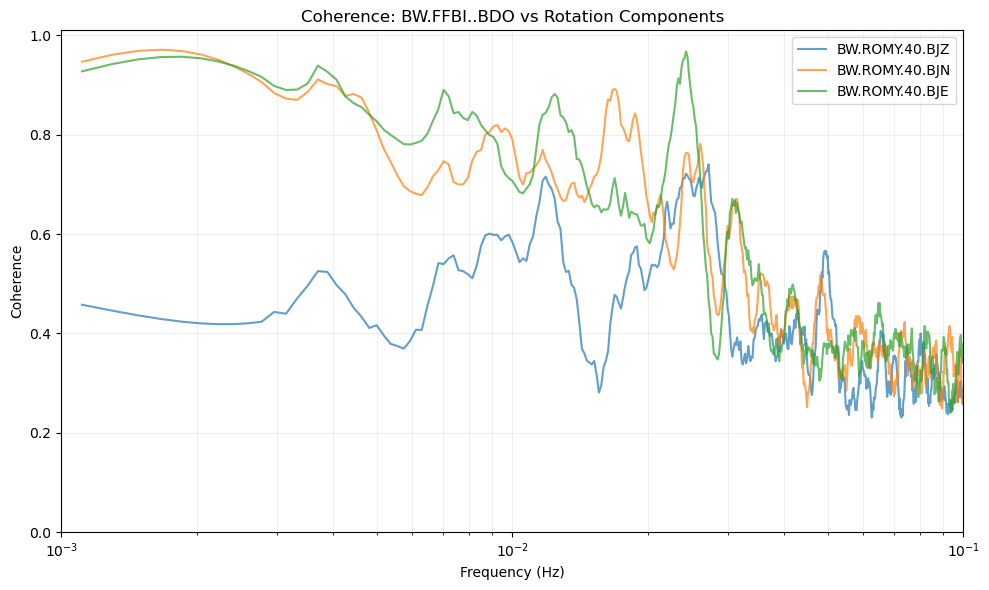

BW.ROMY.40.BJZ | 2024-03-15T15:00:00.004199Z - 2024-03-15T18:00:00.004199Z | 1.0 Hz, 10801 samples
BW.ROMY.40.BJN | 2024-03-15T15:00:00.012800Z - 2024-03-15T18:00:00.012800Z | 1.0 Hz, 10801 samples
BW.ROMY.40.BJE | 2024-03-15T15:00:00.047799Z - 2024-03-15T18:00:00.047799Z | 1.0 Hz, 10801 samples


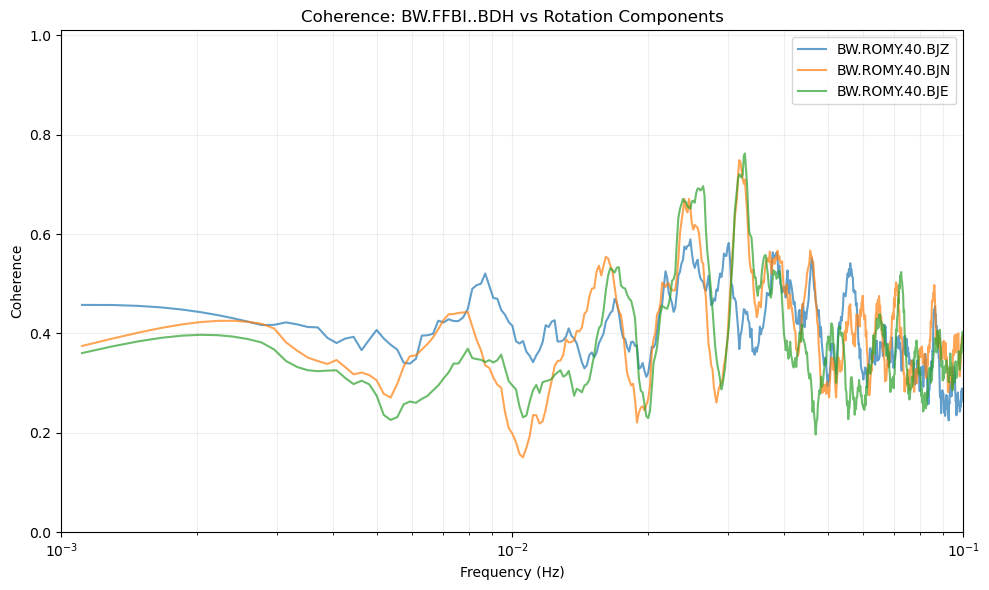

In [9]:
# compute coherence
coherence = bs.compute_coherence(
    window_sec=1.5*3600,  # 1 hour windows
    overlap=0.5,      # 50% overlap
    smooth_points=31, # Smoothing window
    baro_channel="BDO",
    channels=["BJZ", "BJN", "BJE"]
)

# plot results
fig = bs.plot_coherence(
    coherence,
    fmin=0.001,
    fmax=0.1,
    out=True,
)

# fig.savefig(f"./figures/event_{bs.config['tbeg']}_{bs.config['tend']}_bdo_coherence.png")

# compute coherence
coherence = bs.compute_coherence(
    window_sec=1.5*3600,  # 1 hour windows
    overlap=0.5,      # 50% overlap
    smooth_points=31, # Smoothing window
    baro_channel="BDH",
    channels=["BJZ", "BJN", "BJE"]
    
)

# plot results
fig = bs.plot_coherence(
    coherence,
    fmin=0.001,
    fmax=0.1,
    out=True,
)

# fig.savefig(f"./figures/event_{bs.config['tbeg']}_{bs.config['tend']}_bdh_coherence.png")


BW.ROMY.40.BAZ | 2024-03-15T15:00:00.004199Z - 2024-03-15T18:00:00.004199Z | 1.0 Hz, 10801 samples
BW.ROMY.40.BAN | 2024-03-15T15:00:00.012800Z - 2024-03-15T18:00:00.012800Z | 1.0 Hz, 10801 samples
BW.ROMY.40.BAE | 2024-03-15T15:00:00.047799Z - 2024-03-15T18:00:00.047799Z | 1.0 Hz, 10801 samples


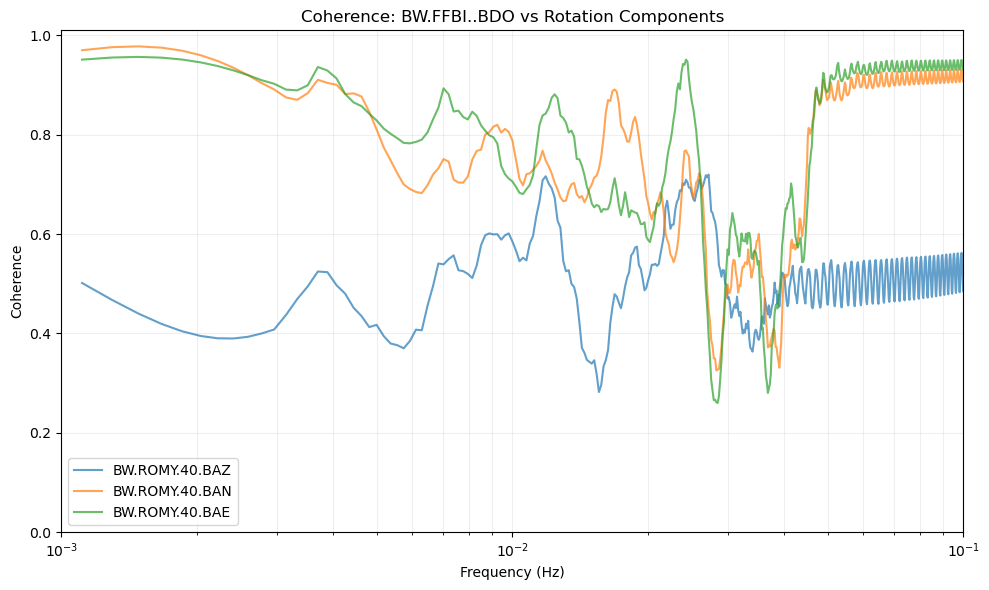

BW.ROMY.40.BAZ | 2024-03-15T15:00:00.004199Z - 2024-03-15T18:00:00.004199Z | 1.0 Hz, 10801 samples
BW.ROMY.40.BAN | 2024-03-15T15:00:00.012800Z - 2024-03-15T18:00:00.012800Z | 1.0 Hz, 10801 samples
BW.ROMY.40.BAE | 2024-03-15T15:00:00.047799Z - 2024-03-15T18:00:00.047799Z | 1.0 Hz, 10801 samples


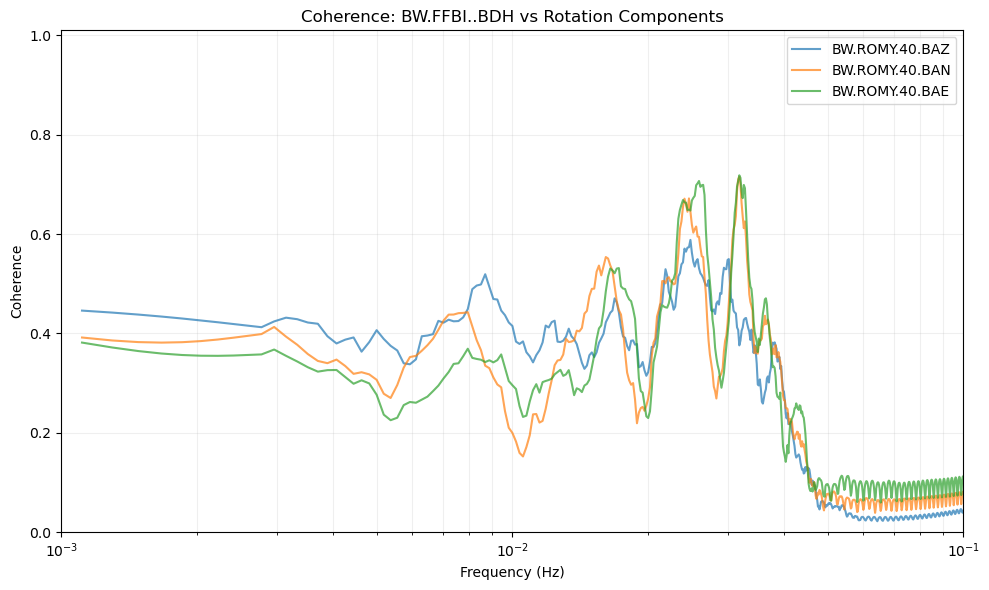

In [10]:
# compute coherence
coherence = bs.compute_coherence(
    window_sec=1.5*3600,  # 1 hour windows
    overlap=0.5,      # 50% overlap
    smooth_points=31, # Smoothing window
    baro_channel="BDO",
    channels=["BAZ", "BAN", "BAE"]
)

# plot results
fig = bs.plot_coherence(
    coherence,
    fmin=0.001,
    fmax=0.1,
    out=True,
)

# fig.savefig(f"./figures/event_{bs.config['tbeg']}_{bs.config['tend']}_bdo_coherence.png")

# compute coherence
coherence = bs.compute_coherence(
    window_sec=1.5*3600,  # 1 hour windows
    overlap=0.5,      # 50% overlap
    smooth_points=31, # Smoothing window
    baro_channel="BDH",
    channels=["BAZ", "BAN", "BAE"]
    
)

# plot results
fig = bs.plot_coherence(
    coherence,
    fmin=0.001,
    fmax=0.1,
    out=True,
)

# fig.savefig(f"./figures/event_{bs.config['tbeg']}_{bs.config['tend']}_bdh_coherence.png")


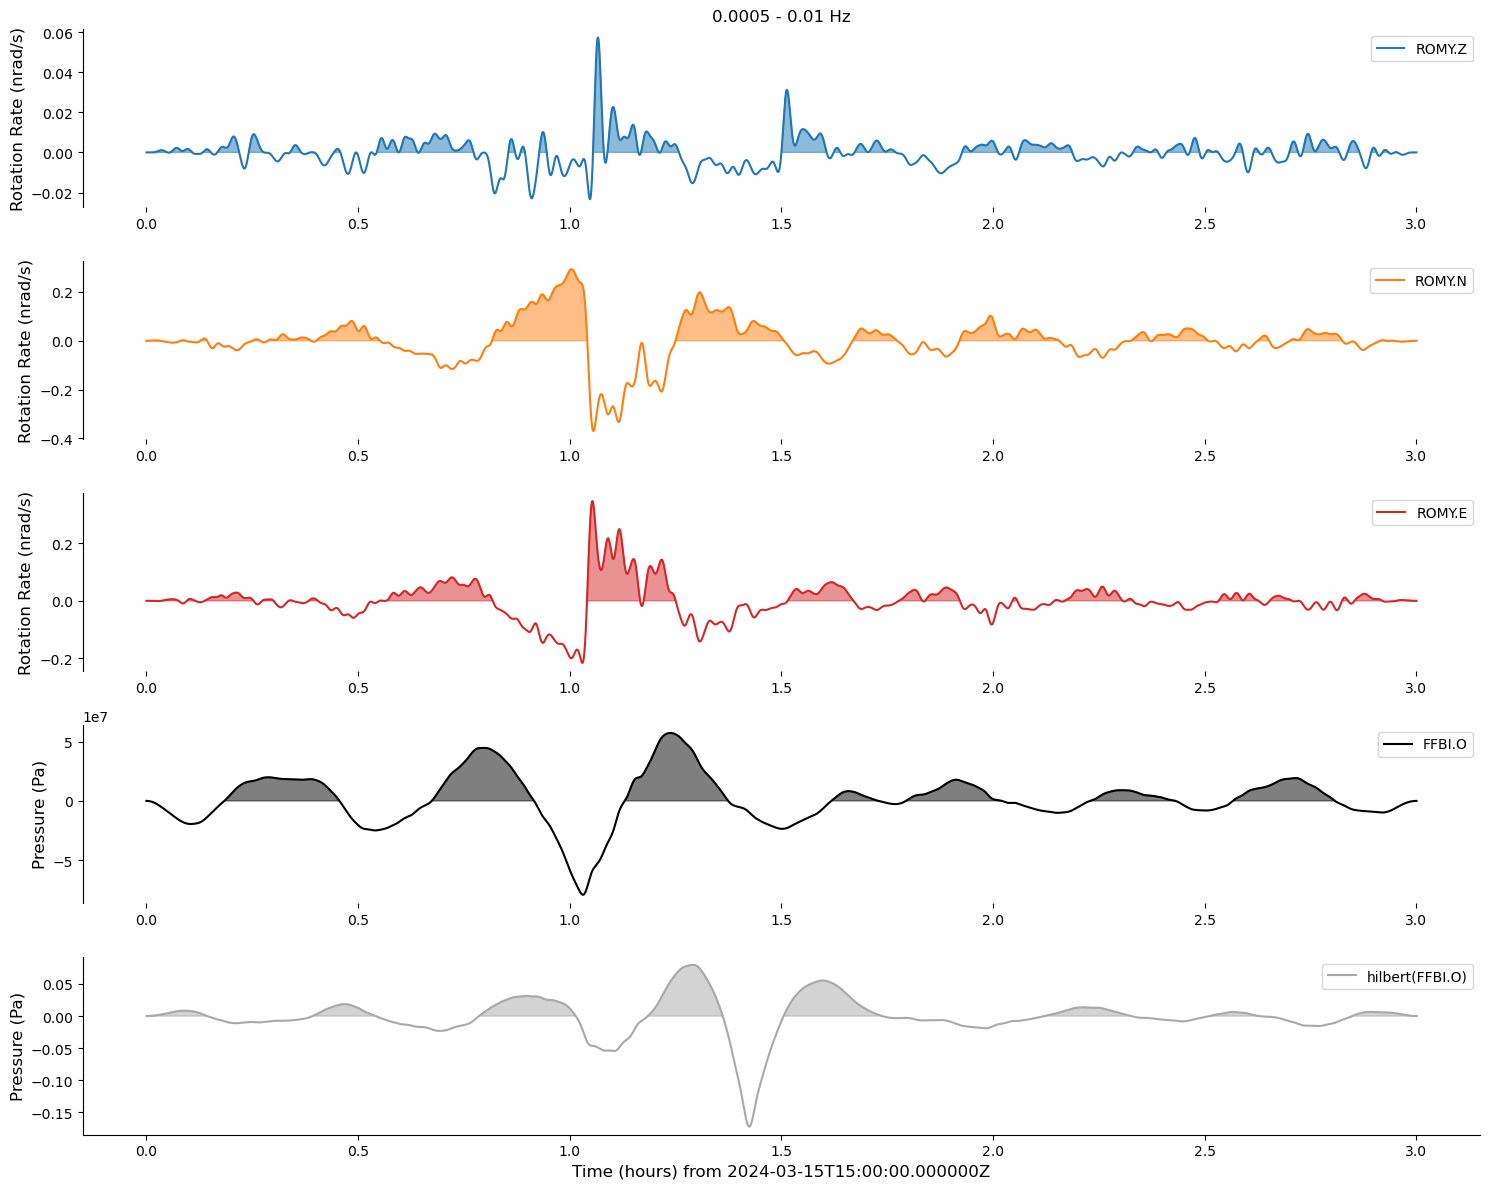

In [10]:
fig = bs.plot_waveforms(bs.st, tunit="hours")

# fig.savefig(f"./figures/event_{bs.config['tbeg']}_{bs.config['tend']}_waveforms.png")

Make prediction for rotation rate


Component N:
P coefficient: -0.000 nrad/s/hPa
H coefficient: 0.000 nrad/s/hPa
Variance reduction: 7.1%

Component E:
P coefficient: 0.000 nrad/s/hPa
H coefficient: -0.000 nrad/s/hPa
Variance reduction: 7.4%

Component Z:
P coefficient: -0.000 nrad/s/hPa
H coefficient: -0.000 nrad/s/hPa
Variance reduction: 1.3%
-74.164652902999 72.55938738116156
52.13470657232412 -52.30380077728375
-3.4068046633941584 -0.6224081799459635


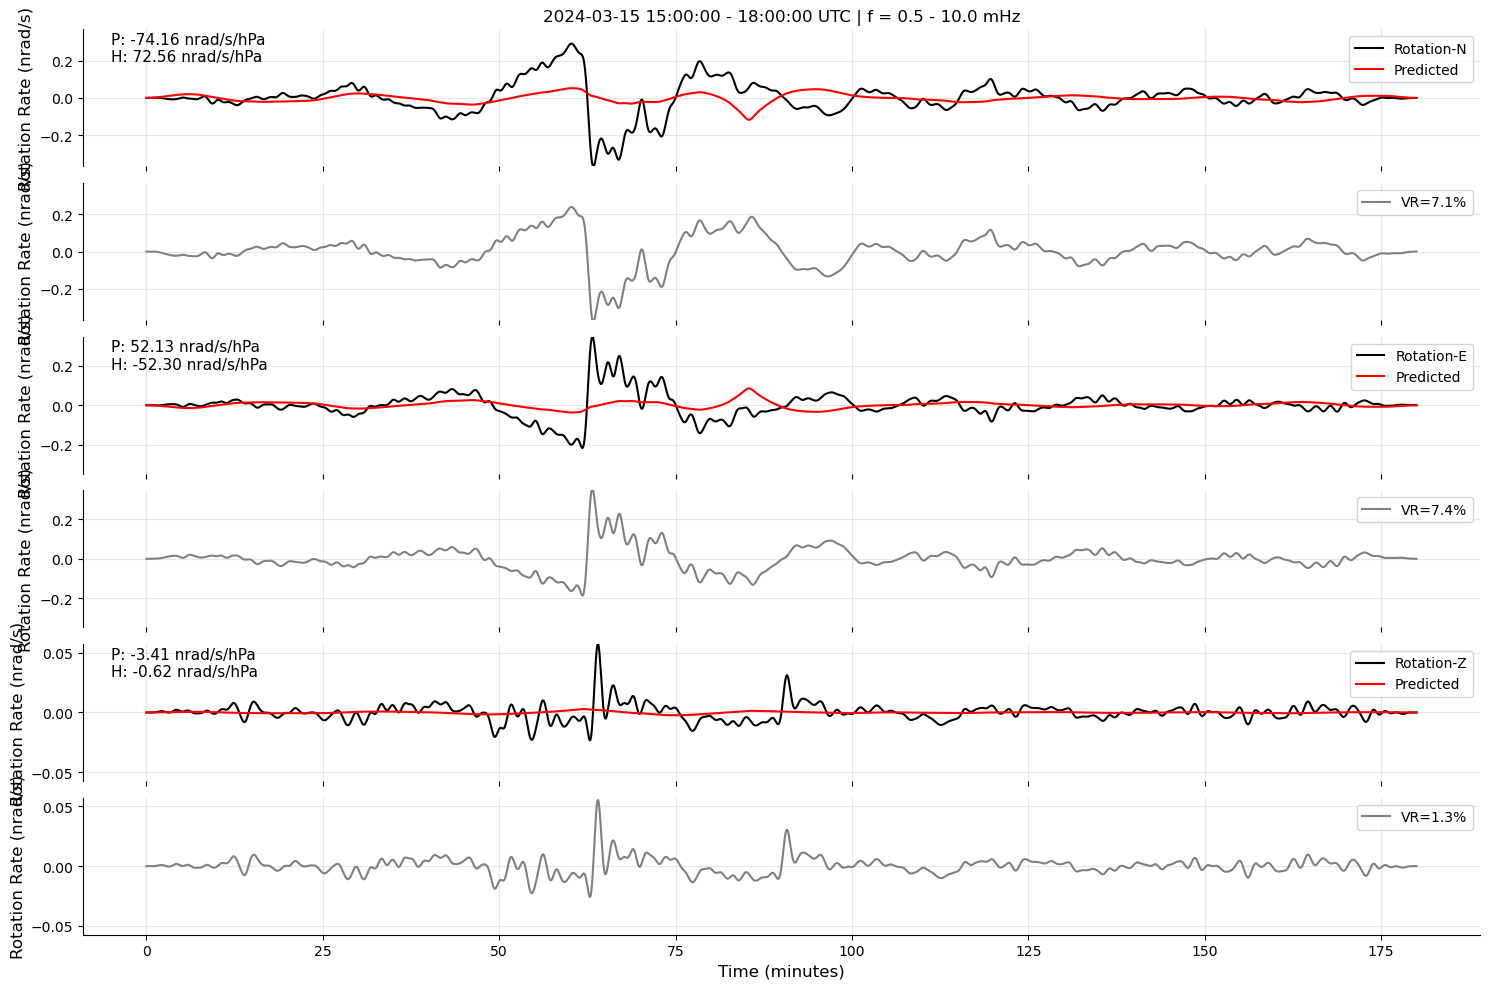

In [11]:
bs.predict_tilt_from_pressure(method="least_squares", channel_type="J")

fig = bs.plot_residuals(tunit="minutes", channel_type="J", out=True)

Make prediction for tilt


Component N:
P coefficient: -0.000 nrad/hPa
H coefficient: -0.000 nrad/hPa
Variance reduction: 89.7%

Component E:
P coefficient: -0.000 nrad/hPa
H coefficient: -0.000 nrad/hPa
Variance reduction: 90.2%

Component Z:
P coefficient: 0.000 nrad/hPa
H coefficient: 0.000 nrad/hPa
Variance reduction: 59.7%
-86487.3794478084 -6989.295497433713
-57579.85767396617 -4169.950901245344
3844.3985122091185 718.6987039492475


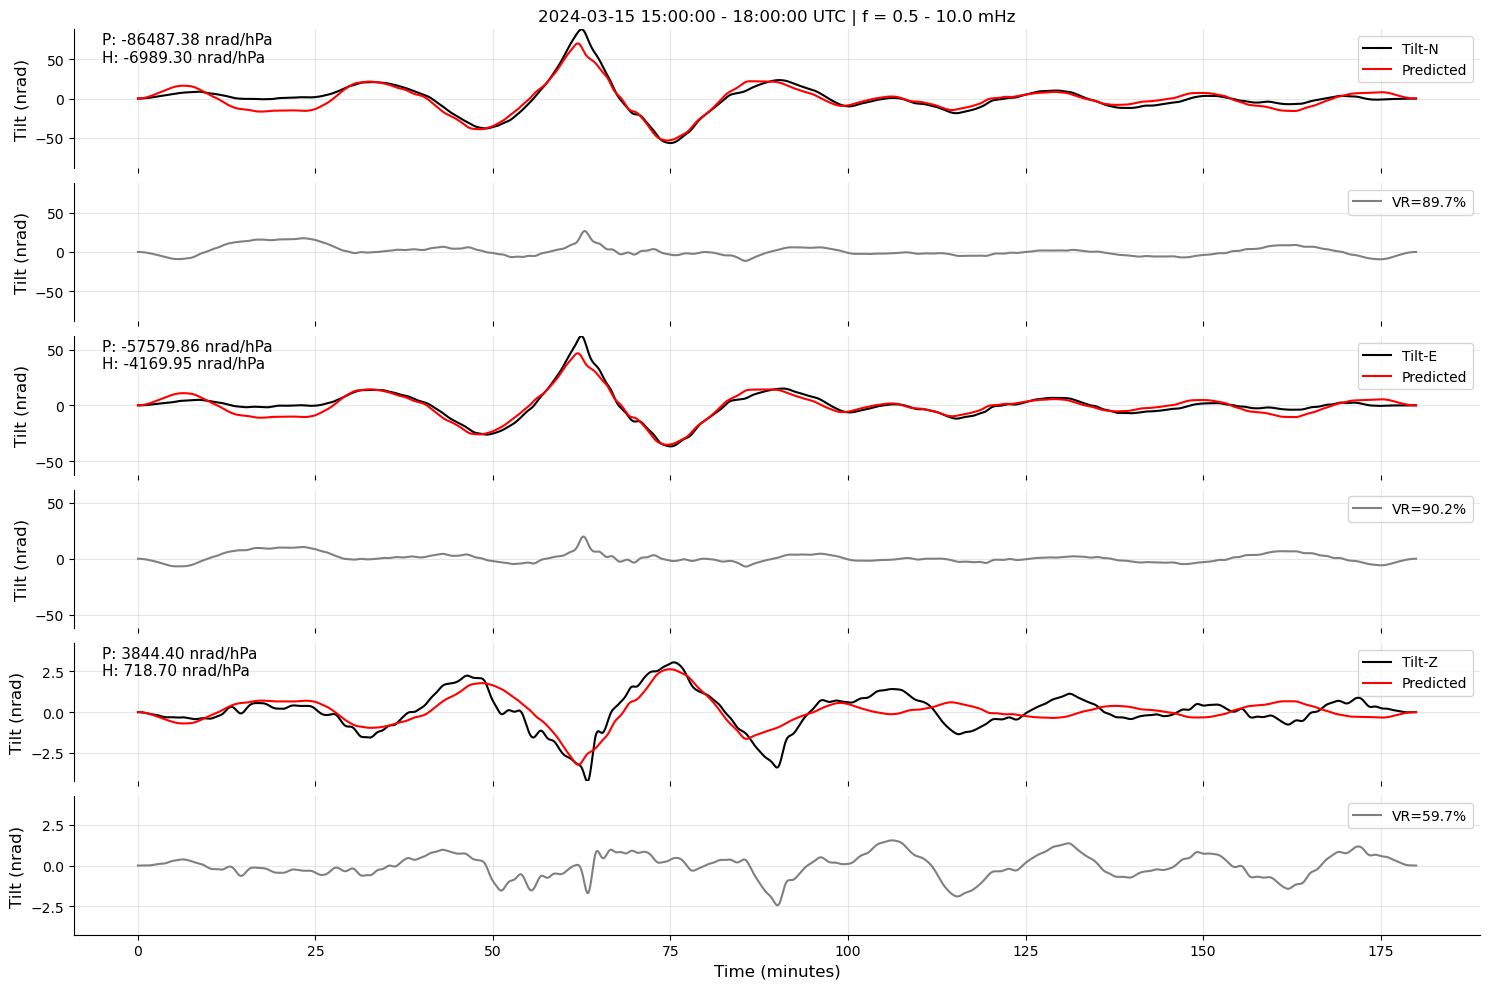

/home/andbro/cursorfiles/baroseis/functions/baroseis.py:2266: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


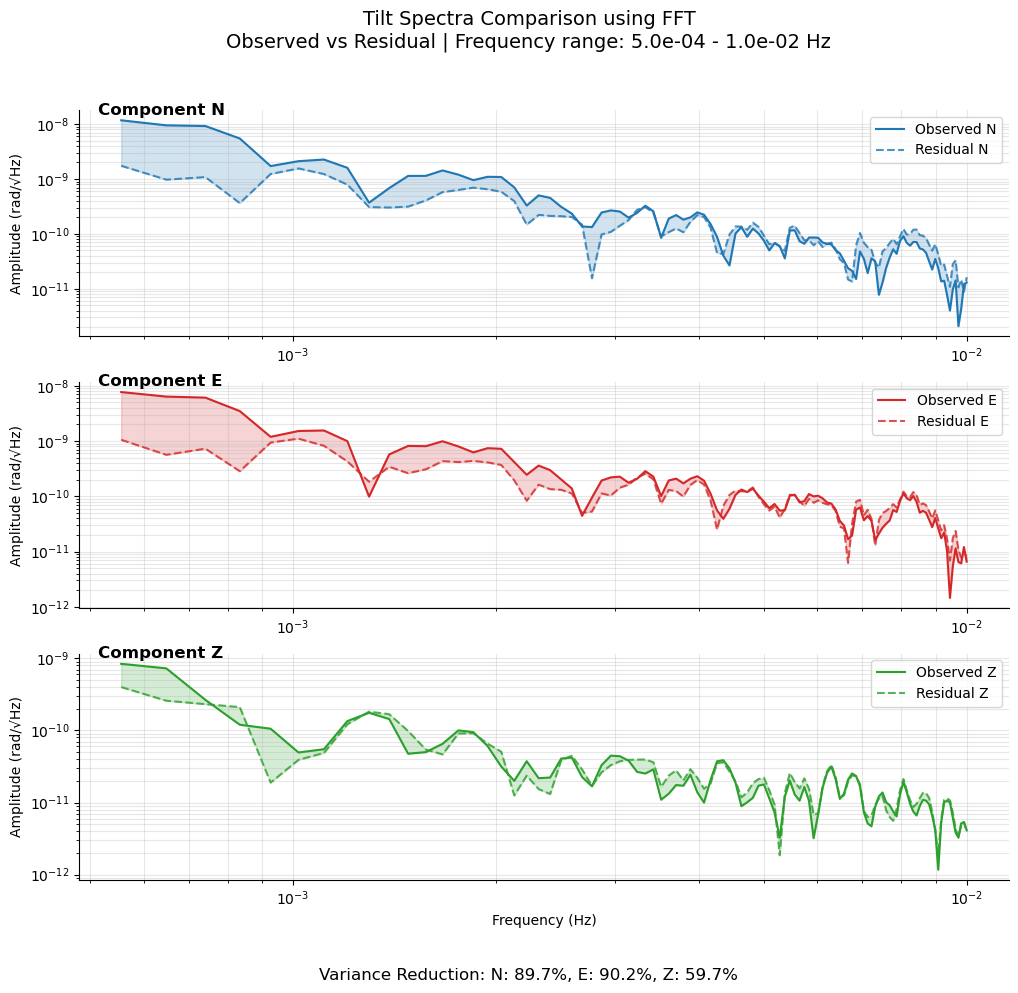

In [12]:
bs.predict_tilt_from_pressure(method="least_squares", channel_type="A")

fig = bs.plot_residuals(tunit="minutes", channel_type="A", out=True)

fig.savefig(f"./figures/event_{bs.config['tbeg']}_{bs.config['tend']}_tilt_residual_waveforms.png")

fig = bs.compare_spectra(method='fft', channel_type='A', fmin=0.0005, fmax=0.01)


Make prediction for rotation rate using RANSAC regression


Component N:
R² Score: -0.5506
Coefficients: [-4.40617739e-10 -1.58048179e-09]
P coefficient: -0.000 nrad/s/hPa
H coefficient: -0.000 nrad/s/hPa
Variance reduction: -55.0%

Component E:
R² Score: -0.4340
Coefficients: [1.48591830e-10 9.54620706e-10]
P coefficient: 0.000 nrad/s/hPa
H coefficient: 0.000 nrad/s/hPa
Variance reduction: -43.4%

Component Z:
R² Score: -0.4729
Coefficients: [-3.99492279e-11 -1.63910485e-10]
P coefficient: -0.000 nrad/s/hPa
H coefficient: -0.000 nrad/s/hPa
Variance reduction: -47.3%
-44.061773941388985 -158.0481794769543
14.859183015936871 95.46207060860456
-3.994922791211355 -16.391048480539805


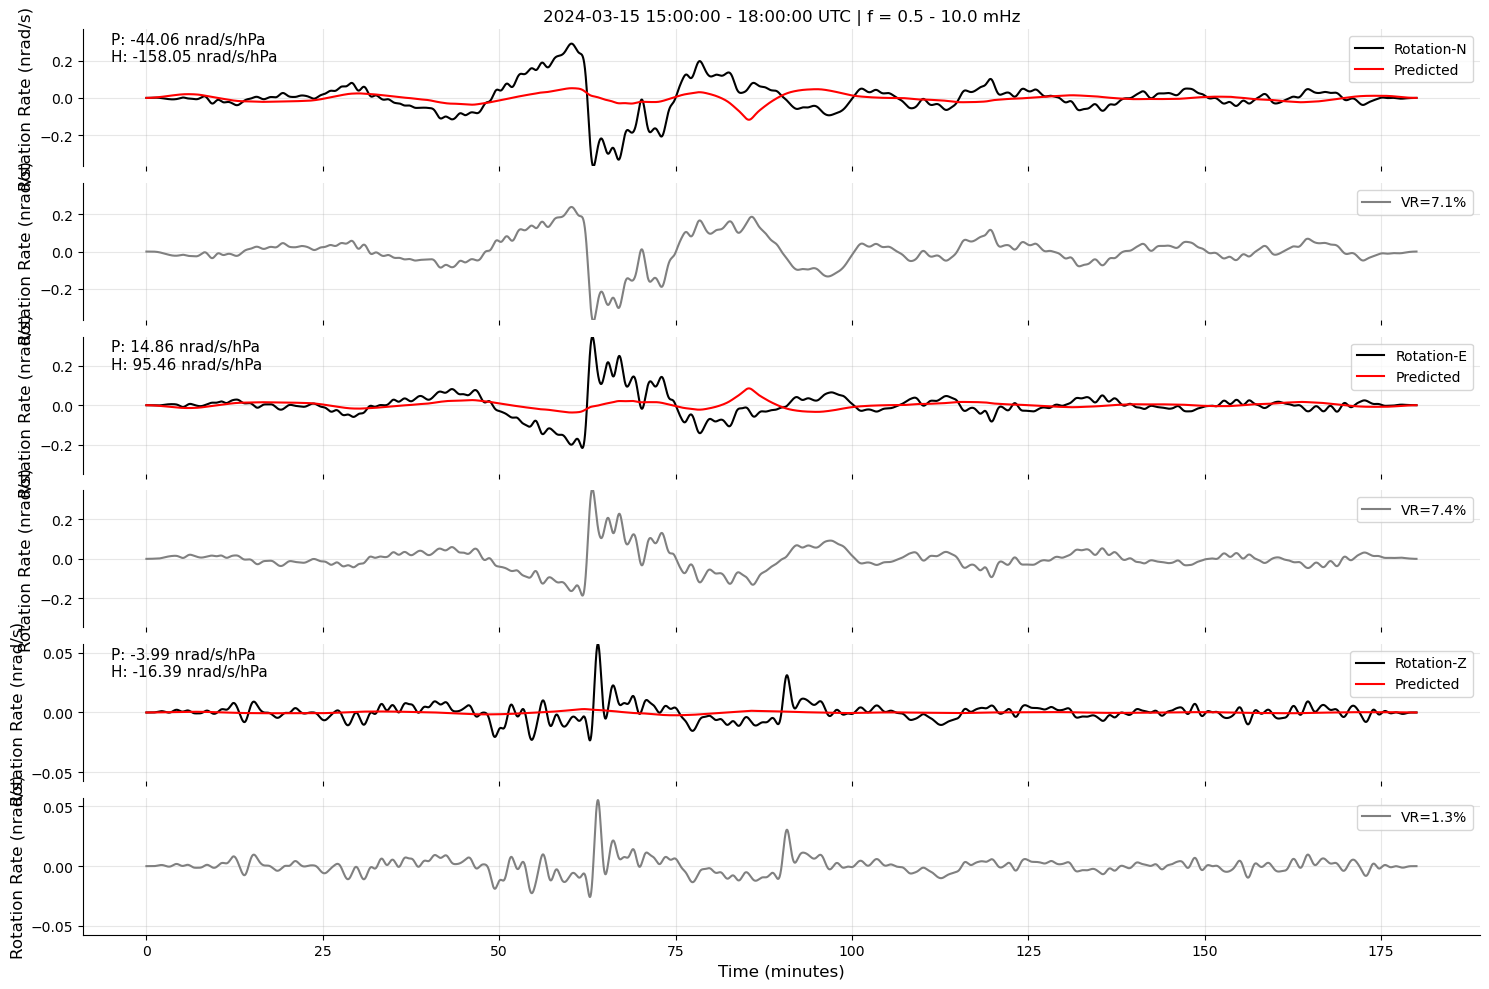

In [14]:
bs.predict_tilt_from_pressure(method="regression", reg_type="ransac", channel_type="J", zero_intercept=True)

fig = bs.plot_residuals(tunit="minutes", channel_type="J", out=True)

fig.savefig(f"./figures/event_{bs.config['tbeg']}_{bs.config['tend']}_rotation_rate_residual_waveforms.png")

Compare regression and least squares modelling

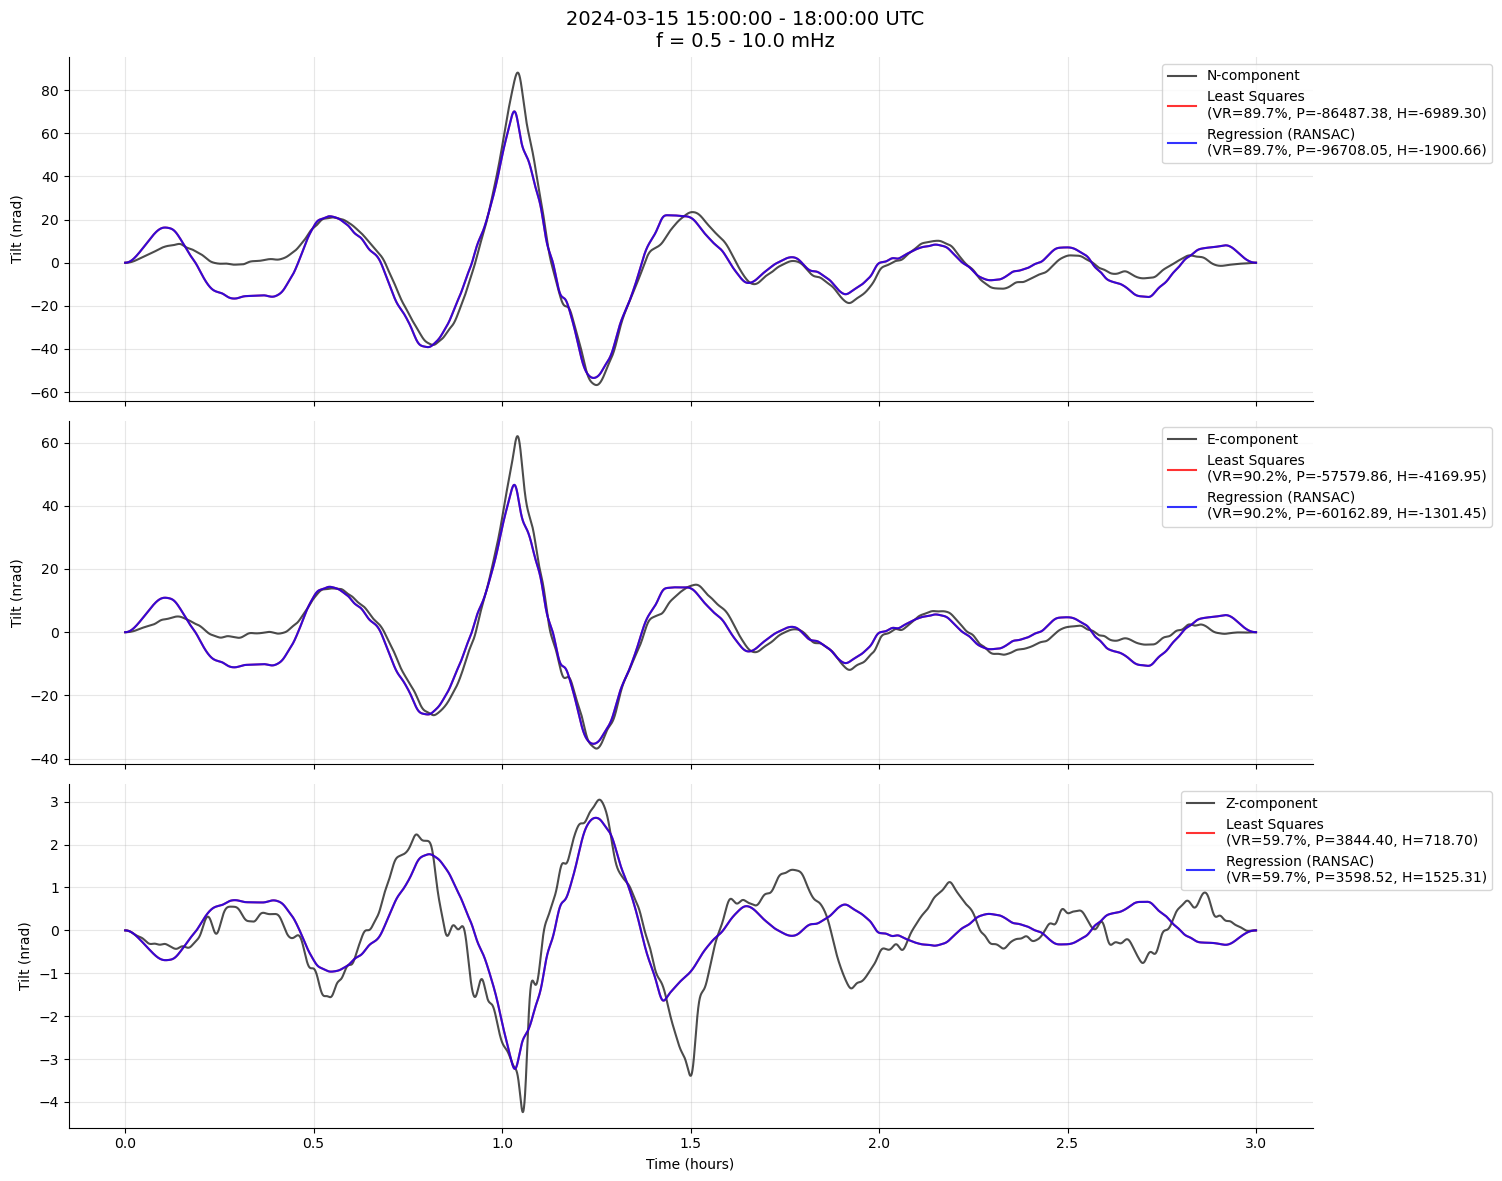

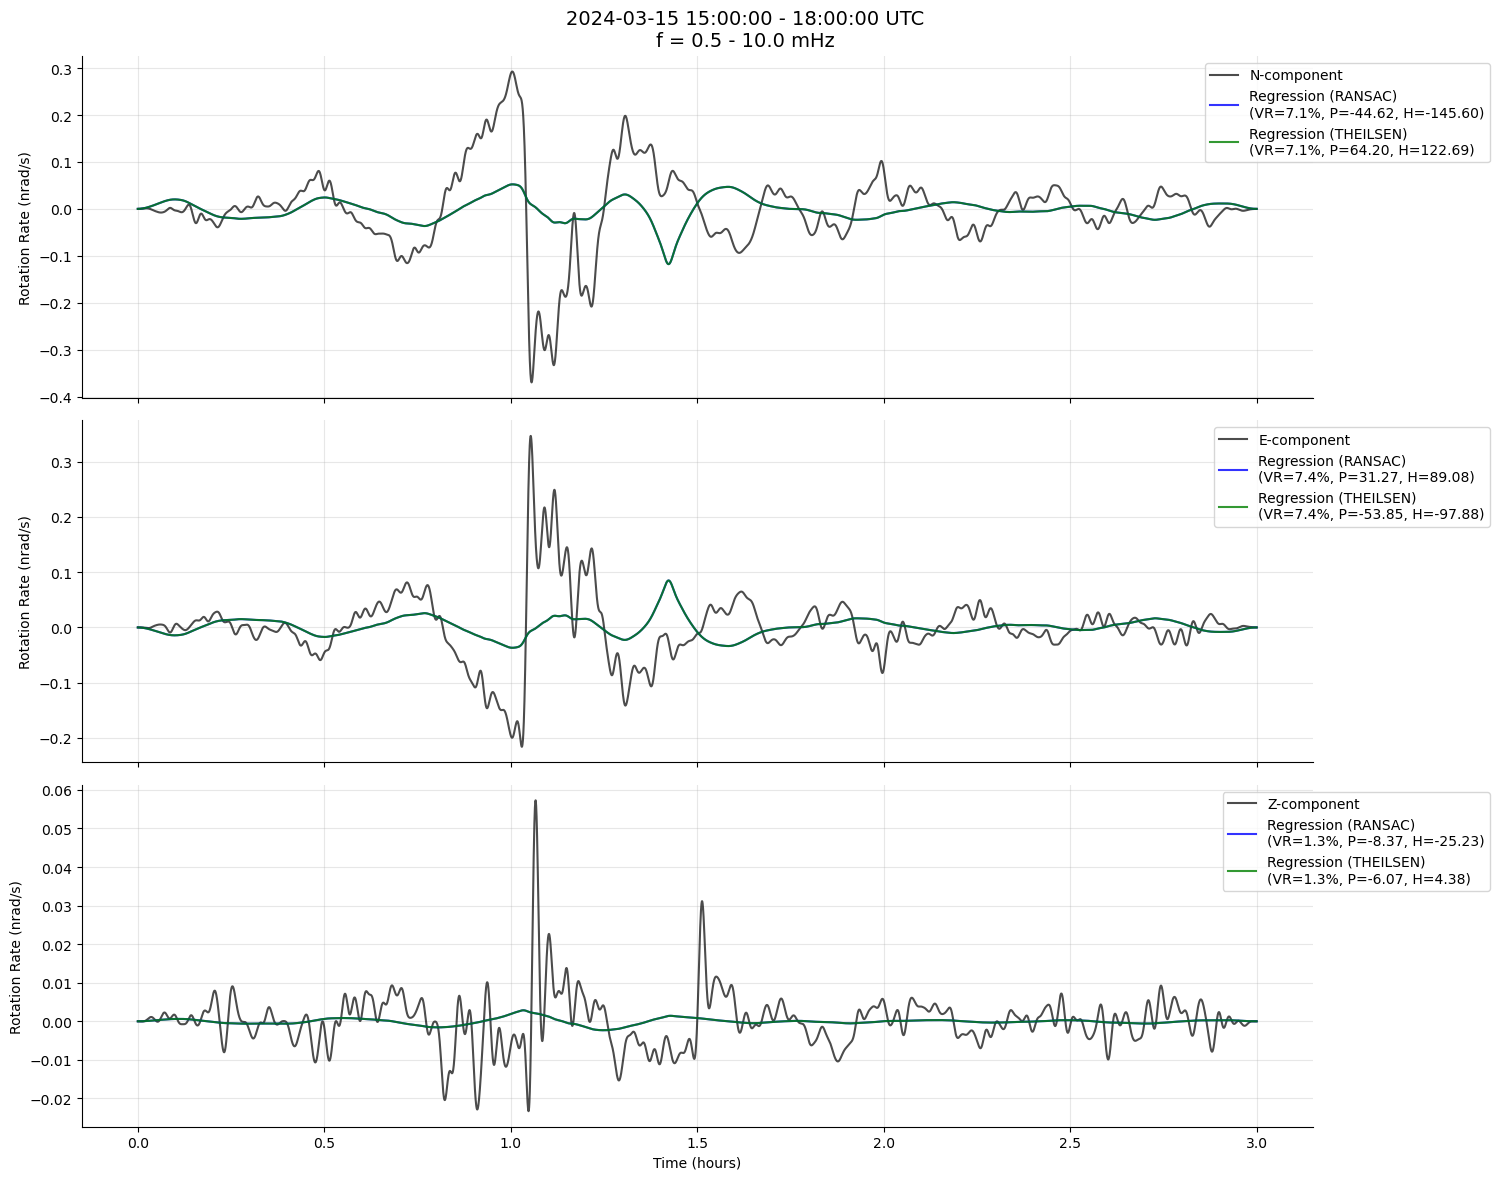

In [15]:
# Compare least squares vs RANSAC regression
bs.compare_prediction_methods(
    method1={'name': 'least_squares', 'reg_type': None, 'color': 'red'},
    method2={'name': 'regression', 'reg_type': 'ransac', 'color': 'blue'},
    channel_type='A'
)

# Compare RANSAC vs TheilSen regression
bs.compare_prediction_methods(
    method1={'name': 'regression', 'reg_type': 'ransac', 'color': 'blue'},
    method2={'name': 'regression', 'reg_type': 'theilsen', 'color': 'green'},
    channel_type='J'
)


Component N:
P coefficient: -0.000 nrad/hPa
H coefficient: -0.000 nrad/hPa
Variance reduction: 89.7%

Component E:
P coefficient: -0.000 nrad/hPa
H coefficient: -0.000 nrad/hPa
Variance reduction: 90.2%

Component Z:
P coefficient: 0.000 nrad/hPa
H coefficient: 0.000 nrad/hPa
Variance reduction: 59.7%


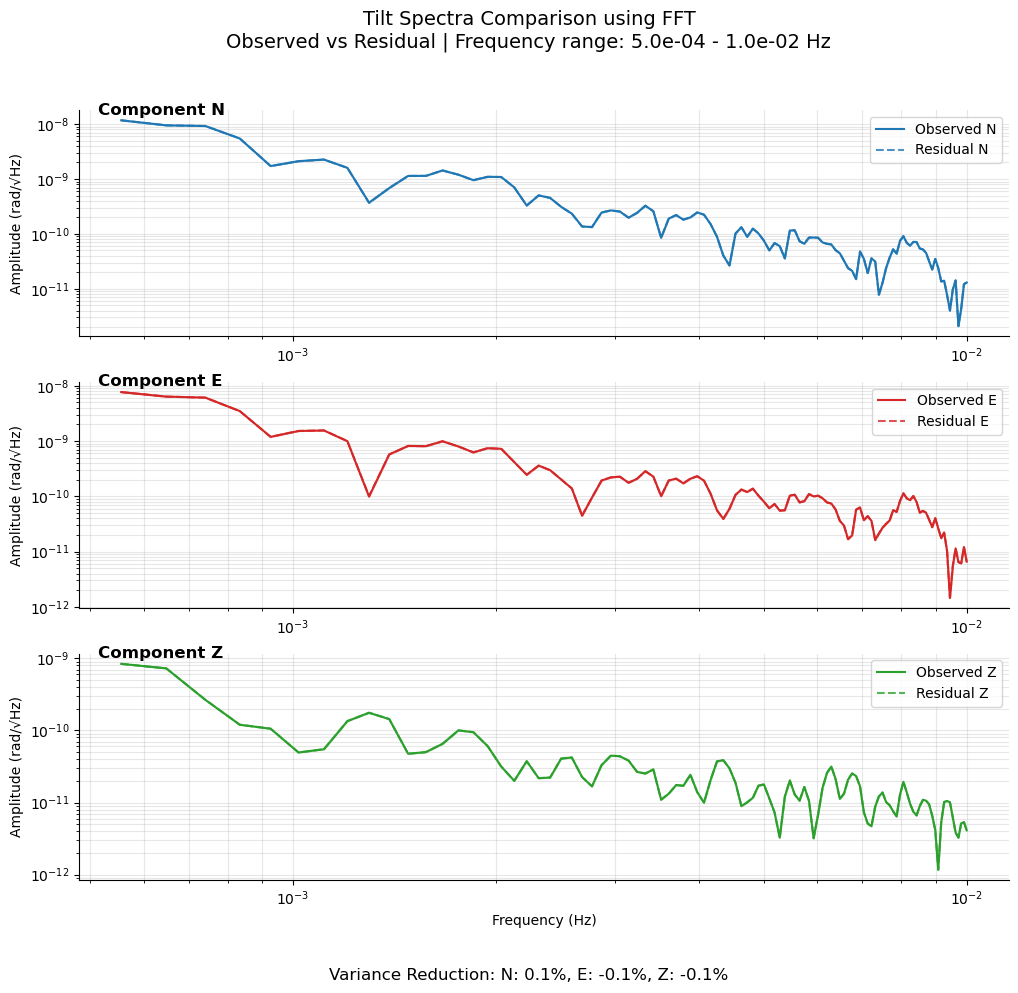

In [25]:
bs.predict_tilt_from_pressure(
    method="least_squares",
    reg_type=None,
    channel_type="A"
)

fig = bs.compare_spectra(method='fft', channel_type='A', fmin=0.0005, fmax=0.01)

# fig.savefig(f"./figures/event_{bs.config['tbeg']}_{bs.config['tend']}_rotation_rate_residual_spectra.png")



Component N:
P coefficient: -0.000 nrad/s/hPa
H coefficient: 0.000 nrad/s/hPa
Variance reduction: 7.1%

Component E:
P coefficient: 0.000 nrad/s/hPa
H coefficient: -0.000 nrad/s/hPa
Variance reduction: 7.4%

Component Z:
P coefficient: -0.000 nrad/s/hPa
H coefficient: -0.000 nrad/s/hPa
Variance reduction: 1.3%


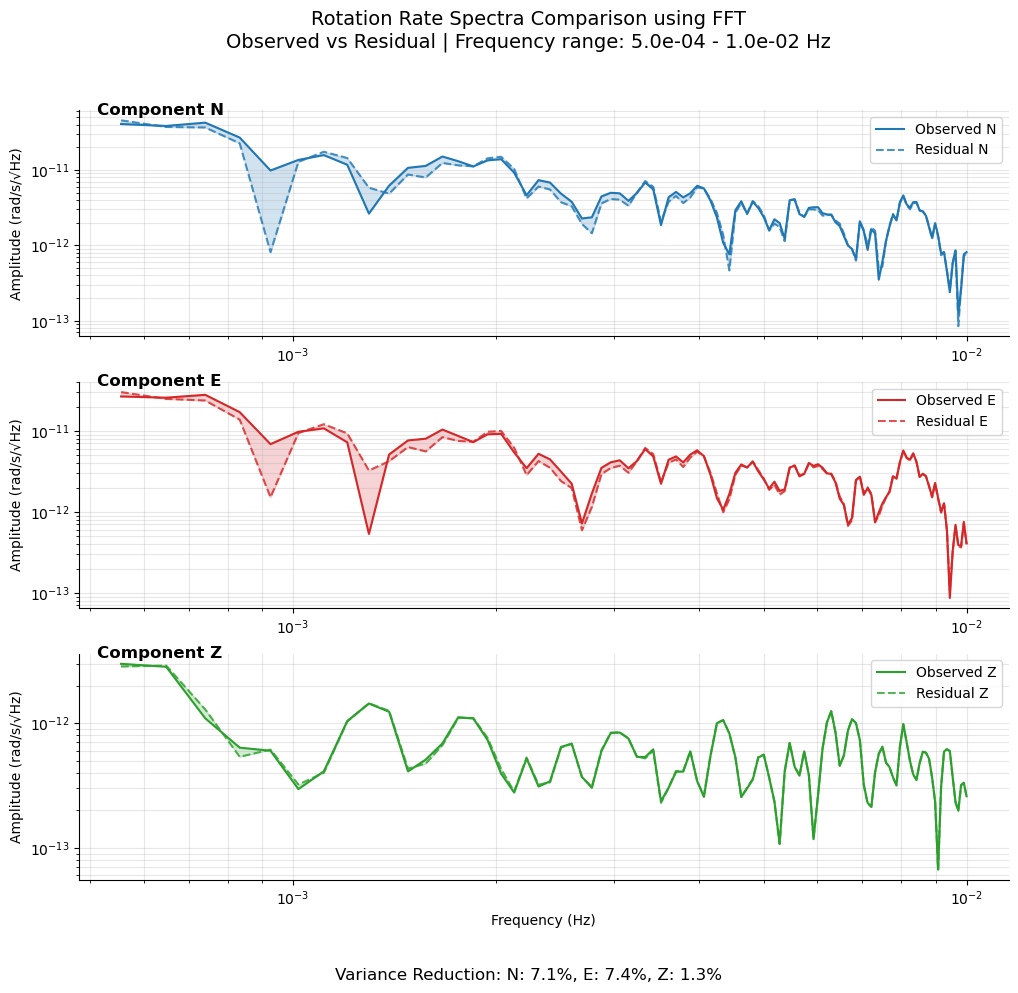

In [17]:
bs.predict_tilt_from_pressure(method="least_squares", reg_type=None, channel_type="J")

fig = bs.compare_spectra(method='fft', channel_type='J', fmin=0.0005, fmax=0.01)

# fig.savefig(f"./figures/event_{bs.config['tbeg']}_{bs.config['tend']}_rotation_rate_residual_spectra.png")


In [18]:

# bs.predict_tilt_from_pressure(method="least_squares", reg_type=None, channel_type="A")

# fig = bs.compare_spectra(method='fft', channel_type='A', fmin=0.0005, fmax=0.01)


In [19]:
# bs.add_pressure_gradient(brmy_seed="BW.BRMY..BDE")

# bs.st.plot(equal_scale=False);